# Chi-Square

Las pruebas chi-cuadrado son pruebas que no tienen supuestos de normalidad y estos no comparan medias a diferencia de t-student, distribucion normal y anova.

# Chi-Square goodness of fit test

La prueba de chi-cuadrado para el ajuste tiene como fin el de determinar lo cerca o lejos que dos distribuciones se encuentran estre si, de este modo que lo que se quiere es buscar responder la siguiente pregunta:


¿La distribución real (observada) difiere del modelo (esperado) debido a un error aleatorio, o las diferencias significan que el modelo no se ajusta a los datos?

## Pasos

- Enuncie las hipótesis nula y alternativa.
- Verifique los supuestos y condiciones.
- Calcular la estadística de prueba.
- Tome una decisión usando valores p o valores críticos.

## Hipotesis

$H_0$ Hipotesis nula | $H_a$ Hipotesis alterna
--- | ---
La distribucion observada es la misma que la esperada | La distribucion observada es diferente que la esperada

## Supuestos

- Condición de datos contados: Los datos deben ser contados para las categorías de una variable categórica.

- Suposición de independencia: los recuentos en las celdas deben ser independientes entre sí (piense en cómo se recopilaron los datos)

- Condición de aleatorización: los individuos contados deben ser una muestra aleatoria de la población.

- Frecuencia esperada de celda/Tamaño de muestra Condición: Espere al menos 5 individuos por celda.

## Data
Para poder realizar las pruebas emplearemos tres ejemplos uno con dos muestras normales de medias iguales y otra con una distribucion normal, la otra uniforme con medias iguales y la ultima con dos distribuciones iguales.

In [124]:
import scipy.stats as sp
import numpy as np

np.random.seed(42)

# First

normalf = sp.norm(loc= 150, scale= 12).rvs(10000)
normals = sp.norm(loc= 150, scale= 12).rvs(10000)

# Second

norm = sp.norm(loc= 70, scale= 10).rvs(10000)
unif = sp.uniform(loc= 70, scale= 10).rvs(10000)

# Third

observed_data = [8, 6, 10, 7, 8, 11, 9]
expected_data = [9, 8, 11, 8, 10, 7, 6]

### First

In [125]:
sum(normalf), sum(normals)

(1499743.6819957895, 1501624.0863677831)

In [126]:
# Para poder realizar esta prueba es necesario que las cantidades en ambas muestras sean iguales.

normals_transformed = np.sum(normalf)*normals/np.sum(normals)

sum(normalf), sum(normals_transformed)

(1499743.6819957895, 1499743.6819957835)

#### Test

In [127]:
sp.chisquare(normalf, normals_transformed)

Power_divergenceResult(statistic=19704.951391951057, pvalue=0.0)

#### De forma grafica

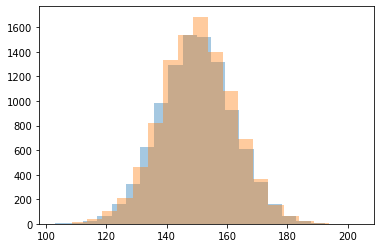

In [128]:
import matplotlib.pyplot as plt

plt.hist(normalf, bins= 20, alpha= 0.4)
plt.hist(normals, bins= 20, alpha= 0.4)
plt.show()

### Second

In [129]:
sum(norm), sum(unif)

(698753.723110264, 749893.875786725)

In [130]:
unif_transformed = np.sum(norm)*unif/np.sum(unif)

sum(norm), sum(unif_transformed)

(698753.723110264, 698753.7231102693)

#### Test

In [131]:
sp.chisquare(norm, unif_transformed)

Power_divergenceResult(statistic=15006.20264494569, pvalue=1.7142677691787394e-208)

#### De forma grafica

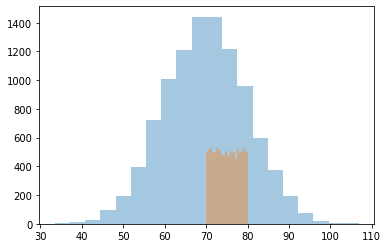

In [132]:
import matplotlib.pyplot as plt

plt.hist(norm, bins= 20, alpha= 0.4)
plt.hist(unif, bins= 20, alpha= 0.4)
plt.show()

### Third

In [133]:
sum(expected_data), sum(observed_data)

(59, 59)

#### Test

In [134]:
sp.chisquare(observed_data, expected_data)

Power_divergenceResult(statistic=5.0127344877344875, pvalue=0.542180861413329)

#### De forma grafica

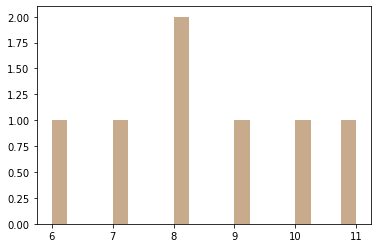

In [135]:
plt.hist(expected_data, bins= 20, alpha= 0.4)
plt.hist(observed_data, bins= 20, alpha= 0.4)
plt.show()

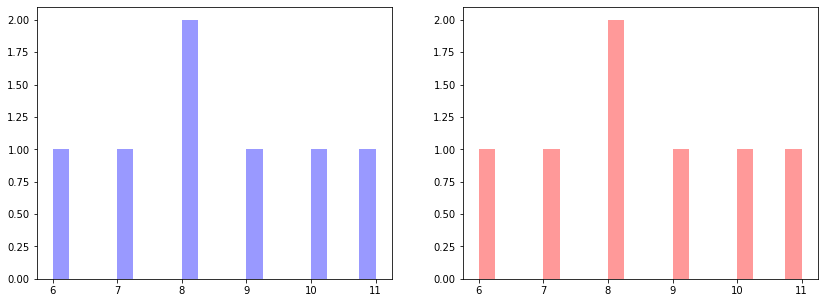

In [136]:
ob, ex = plt.subplots(1, 2, figsize= (14, 5))

ex[0].hist(expected_data, bins= 20, color= 'b', alpha= 0.4)
ex[1].hist(observed_data, bins= 20, color= 'r', alpha= 0.4)

plt.show()

### De forma manual

Vamos a calcular el ultimo ejemplo de forma manual, de modo que la formula es la siguiente:

$$x^2 = \sum{\frac{(Obs-Exp)^2}{Exp}}$$

Donde:

- Obs(observations), son las observacions.
- Exp(expectations), son los esperados.

In [137]:
observed_data = np.array(observed_data)

expected_data = np.array(expected_data)

observed_data, expected_data

(array([ 8,  6, 10,  7,  8, 11,  9]), array([ 9,  8, 11,  8, 10,  7,  6]))

In [138]:
f_step = observed_data - expected_data
f_step

array([-1, -2, -1, -1, -2,  4,  3])

In [139]:
s_step = f_step ** 2
s_step

array([ 1,  4,  1,  1,  4, 16,  9])

In [140]:
t_step = s_step / expected_data
t_step

array([0.11111111, 0.5       , 0.09090909, 0.125     , 0.4       ,
       2.28571429, 1.5       ])

In [141]:
statistic = sum(t_step)
statistic

5.0127344877344875

In [142]:
# P- value

1 - sp.chi2.cdf(statistic, df= 6)

0.542180861413329

## Residuos estandarizados(Standarized residuals)

Los residuos estandarizados son la diferencia entre los valores observados y los valores estandarizados, estos tienen la formula:

$$\text{standarized residuals} = \frac{Obs-Exp}{\sqrt{Exp}}$$

Donde:

- Obs, Son las observaciones.
- Exp, Son los valores esperados.

In [143]:
f_step_res = observed_data - expected_data
f_step_res

array([-1, -2, -1, -1, -2,  4,  3])

In [152]:
s_step_res = f_step_res / np.sqrt(expected_data)
s_step_res

array([-0.33333333, -0.70710678, -0.30151134, -0.35355339, -0.63245553,
        1.51185789,  1.22474487])

In [155]:
import statsmodels.api as sm 

obs_exp_data = [observed_data, expected_data]

table = sm.stats.Table(obs_exp_data)

stand_res = table.standardized_resids
stand_res

array([[-0.26215362, -0.5693644 , -0.24068304, -0.276361  , -0.51207638,
         1.02415277,  0.82908301],
       [ 0.26215362,  0.5693644 ,  0.24068304,  0.276361  ,  0.51207638,
        -1.02415277, -0.82908301]])

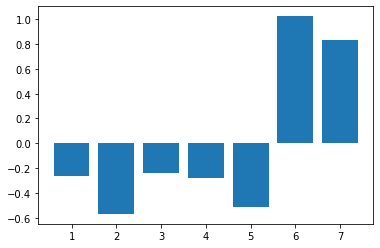

In [146]:
plt.bar([1,2,3,4,5,6,7], stand_res[0])
plt.show()